# Heart Disease Prediction UCI - Classification


- **Case**: You have been summoned by the regional hospital to develop an intelligent system that, upon providing these attributes, your **model indicates whether the patient has coronary diseases or not. Depending on the outcome of your model, the patient is expedited to a specialist 

[Classification]


- **GOAL:** Create a Machine Learning model with optimized hyperparameters for F1 Score 

### Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Clening Check-up:


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Understanding : 

Feature Understanding: 
    age: Age (Years)
    sex: Gender (1 = Male, 0 = Female)
    cp: Chest Pain Level (1 to 4)
    trestbps: Resting Blood Pressure
    chol: Cholesterol in mg/dl
    fbs: Fasting Blood Sugar > 120 mg/dl (1 = True, 0 = False)
    restecg: Resting Electrocardiogram (0, 1, or 2)
    thalach: Maximum Heart Rate
    exang: Exercise Induced Angina (1 = Yes, 0 = No)
    oldpeak: ST Depression Induced by Exercise Relative to Rest
    slope: Slope of the Peak Exercise ST Segment
    ca: Number of Major Vessels Colored by Fluoroscopy
    thal: Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)

In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

C:\Anaconda33\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

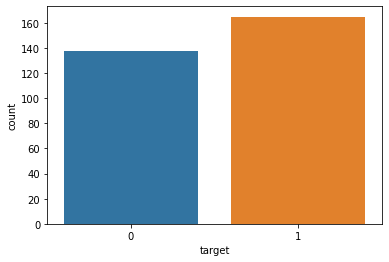

In [11]:
plt.subplot()
sns.countplot(df['target'])

C:\Anaconda33\lib\site-packages\seaborn\distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


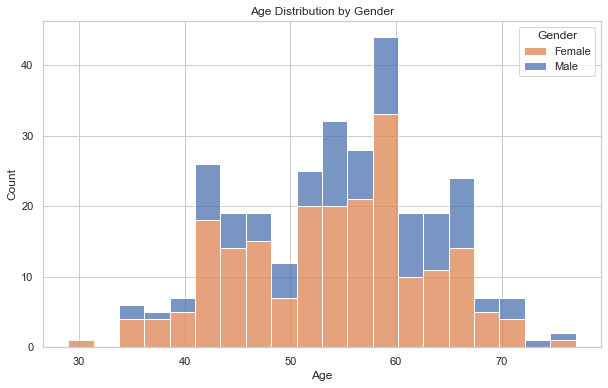

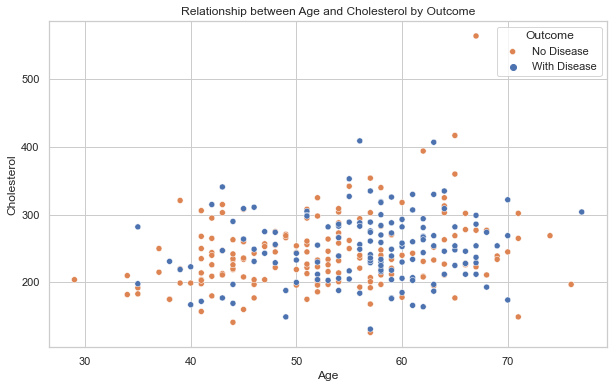

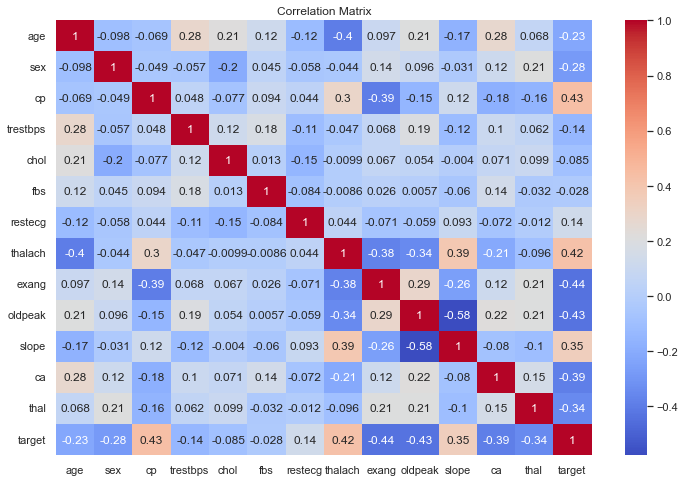

In [12]:
# Set the style of the plots
sns.set(style="whitegrid")

# Plot of age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", hue="sex", multiple="stack", bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

# Plot of the relationship between age and cholesterol for different outcomes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="chol", hue="target")
plt.title('Relationship between Age and Cholesterol by Outcome')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Outcome', labels=['No Disease', 'With Disease'])
plt.show()

# Plot of the correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


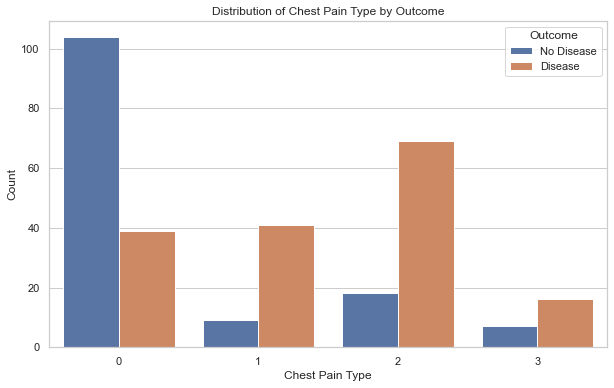

In [13]:


# Set the figure size for the countplot
plt.figure(figsize=(10, 6))

# Create a countplot for categorical variables "cp" with hue based on "target"
sns.countplot(data=df, x="cp", hue="target")

# Set the title, x-axis label, y-axis label, and legend
plt.title('Distribution of Chest Pain Type by Outcome')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Disease', 'Disease'])

# Show the plot
plt.show()

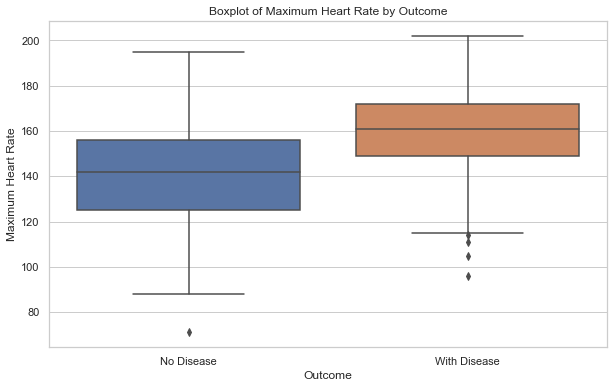

In [14]:
# Set the style of the plot
sns.set(style="whitegrid")

# Boxplot for Maximum Heart Rate by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="target", y="thalach")
plt.title('Boxplot of Maximum Heart Rate by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Maximum Heart Rate')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'With Disease'])
plt.show()

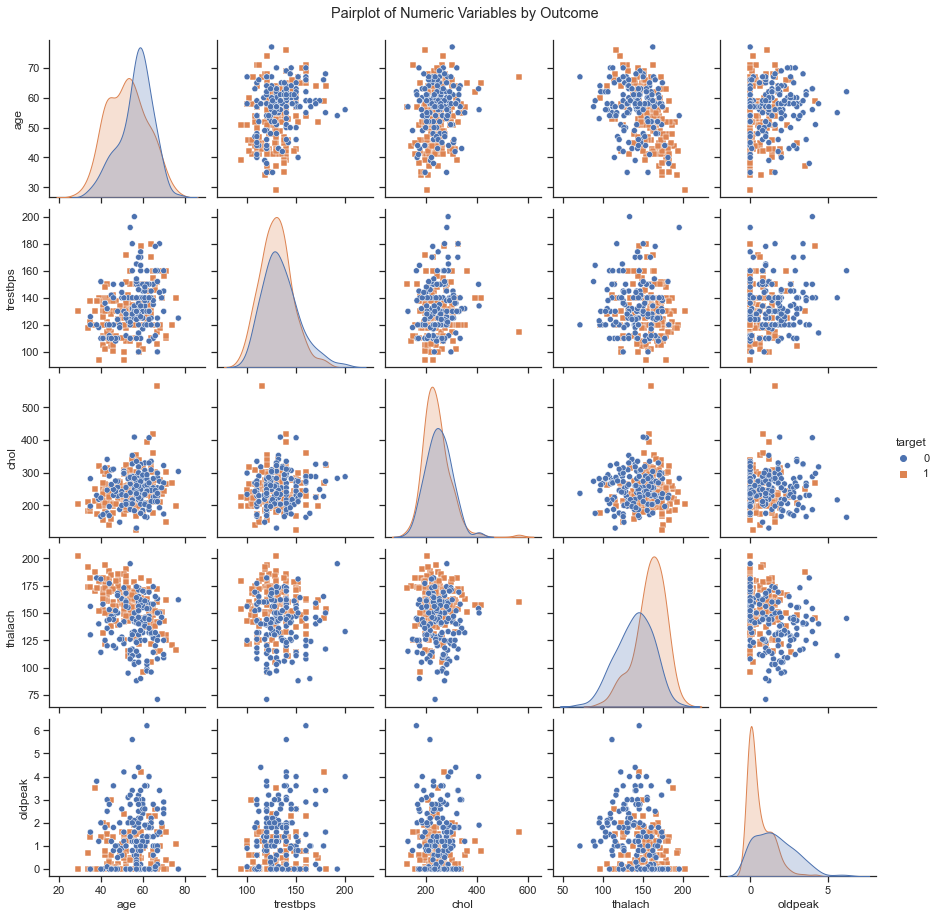

In [15]:
#Pairplot to visualize relationships between variables: 

# Set the plotting style
sns.set(style="ticks")

# Define the subset of columns for the pairplot
subset_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a pairplot of the selected numeric variables with hue based on "target"
sns.pairplot(data=df, vars=subset_columns, hue="target", diag_kind="kde", markers=["o", "s"])

# Set the title for the pairplot
plt.suptitle('Pairplot of Numeric Variables by Outcome', y=1.02)

# Show the plot
plt.show()


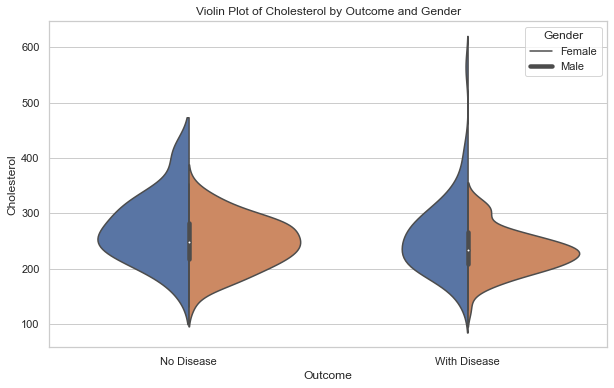

In [16]:
# Set the style of the plot
sns.set(style="whitegrid")

# Violin Plot for Continuous Variables
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="target", y="chol", hue="sex", split=True)
plt.title('Violin Plot of Cholesterol by Outcome and Gender')
plt.xlabel('Outcome')
plt.ylabel('Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'With Disease'])
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### RandomForestClassifier


The use of the RandomForestClassifier is appropriate for this project for several reasons:

- **Classification Problem:** The goal of the project is to **classify patients into two categories: whether they have coronary diseases or not. RandomForestClassifier is a powerful classification algorithm that works well for binary classification** tasks like this one.

- **Complex Relationships:** Coronary diseases can have complex relationships with various factors such as age, gender, cholesterol levels, and more. **RandomForestClassifier is capable of capturing non-linear relationships and interactions among features, making it suitable for identifying complex patterns in the data.**

Feature Importance: RandomForestClassifier provides a measure of feature importance, which can help in identifying which factors contribute the most to predicting coronary diseases. This information is valuable for medical professionals to understand the key indicators.

Ensemble Method: RandomForestClassifier is an ensemble method that combines multiple decision trees, which helps to reduce overfitting and increase model generalization. This is important for creating a robust model that performs well on new, unseen data.

Handling Missing Values and Outliers: RandomForestClassifier can handle missing values and outliers well without requiring extensive data preprocessing. This is beneficial as medical datasets often have missing values and outliers.

Interpretability: While not as interpretable as linear models, RandomForestClassifier still provides insights into feature importance and decision-making, aiding medical professionals in understanding the basis of the model's predictions.

Scalability: RandomForestClassifier is efficient and can handle larger datasets, which is important when dealing with medical data that might involve a substantial number of patient records.

Considering these factors, RandomForestClassifier is a suitable choice for building a predictive model to indicate whether a patient has coronary diseases. Its ability to handle complex relationships, provide feature importance insights, and handle various data characteristics align well with the project's goals.

### Train Test Split settings

In [17]:
X = df.drop(columns=["target"], axis=1)

y = df[["target"]]

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode the target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [39]:
X = pd.get_dummies(X)

### Normalizing X

In [40]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

### RandomForestClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
rf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

### Confusion Matrix

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


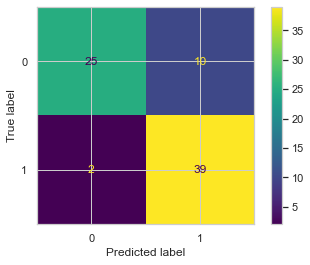

In [45]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf, X_test, y_test, values_format='d');

### Assessing Metrics: 


In [46]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


print(f"F1-Score (Train): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Test): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")

print(f"Accuracy (Train): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy (Test): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Balanced Accuracy (Train): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Balanced Accuracy (Test): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Train): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Test): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Train): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Test): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Train): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Test): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")


F1-Score (Train): 1.0
F1-Score (Test): 0.8666666666666666
Accuracy (Train): 1.0
Accuracy (Test): 0.8421052631578947
Balanced Accuracy (Train): 1.0
Balanced Accuracy (Test): 0.8327526132404182
Precision (Train): 1.0
Precision (Test): 0.7959183673469388
Recall (Train): 1.0
Recall (Test): 0.9512195121951219
ROCAUC (Train): 1.0
ROCAUC (Test): 0.9156794425087107


### GridSearch

In [47]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [49]:
dict = grid_search.best_estimator_.get_params()

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 10, max_features= 'auto',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [51]:
rf_tunned.fit(X_train, y_train)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=500)

In [52]:
rf_tunned.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [53]:
X_test.assign(df = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,df,label
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.00,0.666667,1,1
210,0.583333,1.0,0.666667,0.320755,0.235160,0.0,0.0,0.603053,0.0,0.064516,0.5,0.25,1.000000,0,1
133,0.250000,1.0,0.333333,0.150943,0.248858,0.0,0.5,0.625954,0.0,0.000000,1.0,0.00,0.666667,1,1
302,0.583333,0.0,0.333333,0.339623,0.251142,0.0,0.0,0.786260,0.0,0.000000,0.5,0.25,0.666667,0,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.312500,0.0,0.666667,0.132075,0.034247,0.0,0.5,0.793893,0.0,0.096774,0.5,0.00,0.666667,1,1
18,0.291667,1.0,0.000000,0.528302,0.276256,0.0,0.5,0.763359,0.0,0.241935,1.0,0.00,0.666667,1,1
24,0.229167,1.0,1.000000,0.433962,0.166667,0.0,0.5,0.816794,1.0,0.225806,1.0,0.00,1.000000,1,1
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0,1


### Assessing Metrics: 

In [54]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Accuracy (Train): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Accuracy (Test): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Balanced Accuracy (Train): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Balanced Accuracy (Test): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Train): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Test): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Train): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Test): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Train): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Test): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Train): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Test): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")


Accuracy (Train): 1.0
Accuracy (Test): 0.8552631578947368
Balanced Accuracy (Train): 1.0
Balanced Accuracy (Test): 0.8449477351916377
Precision (Train): 1.0
Precision (Test): 0.8
Recall (Train): 1.0
Recall (Test): 0.975609756097561
F1-Score (Train): 1.0
F1-Score (Test): 0.8791208791208791
ROCAUC (Train): 1.0
ROCAUC (Test): 0.9163763066202091


In [55]:
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")


F1-Score (Treino): 1.0
F1-Score (Teste): 0.8791208791208791


### Summarized Code: 

Here is a succinct version of what was coded for this project, as well as the steps taken: 

It includes:

1- Loading the data from a CSV file.

2- Splitting the data into features (X) and labels (y).

3- Splitting the data into training and testing sets.

4- Creating a Random Forest model.

5- Defining a set of hyperparameters for tuning using a grid search.

6- Setting up a GridSearchCV object to find the best hyperparameters based on F1 Score.

7- Training the optimized model using the training data.

8- Extracting the best hyperparameters found by the grid search.

9- Using the optimized model to predict labels on the testing set.

10- Calculating the F1 Score on the testing set.

11- Displaying a classification report summarizing the model's performance.
This code encapsulates the core steps of loading data, preprocessing, model training, hyperparameter tuning, evaluation, and result display. 


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV

# Load the data
data = pd.read_csv('heart.csv')  # Replace with your CSV file name

# Split the data into features (X) and labels (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for hyperparameter optimization using F1 Score
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Train the optimized model
grid_search.fit(X_train, y_train)

# Get the best found hyperparameters
best_params = grid_search.best_params_

# Use the optimized model to predict labels on the testing set
y_pred = grid_search.predict(X_test)

# Calculate the F1 Score on the testing set
f1 = f1_score(y_test, y_pred)

# Display the classification report
classification_rep = classification_report(y_test, y_pred)

print("Best hyperparameters:", best_params)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
F1 Score: 0.8571428571428571
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming X is the reduced-dimensional data using PCA
# For this example, let's assume X has 2 dimensions after PCA

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# SVM with Polynomial Kernel
svm_poly_model = SVC(kernel='poly', degree=3, random_state=42)
svm_poly_model.fit(X_train, y_train)
svm_poly_pred = svm_poly_model.predict(X_test)
svm_poly_accuracy = accuracy_score(y_test, svm_poly_pred)

# SVM with Linear Kernel
svm_linear_model = SVC(kernel='linear', random_state=42)
svm_linear_model.fit(X_train, y_train)
svm_linear_pred = svm_linear_model.predict(X_test)
svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_pred)

# Print accuracies
print("Decision Tree Accuracy:", dt_accuracy)
print("SVM with Polynomial Kernel Accuracy:", svm_poly_accuracy)
print("SVM with Linear Kernel Accuracy:", svm_linear_accuracy)
print("Neural Network Accuracy:", nn_accuracy)


Decision Tree Accuracy: 0.7540983606557377
SVM with Polynomial Kernel Accuracy: 0.7704918032786885
SVM with Linear Kernel Accuracy: 0.8688524590163934
Neural Network Accuracy: 0.47540983606557374


### Shap and Lime: Assessing feature importance

In order to derive better understanding, it's possible to make use of  LIME (Local Interpretable Model-agnostic Explanations) or SHAP (SHapley Additive exPlanations) to assess feature importance in conjunction with RandomForestClassifier.


1. **LIME:** LIME is a model-agnostic technique that explains the predictions of any machine learning model by approximating the model's behavior locally around a specific instance. It generates easily interpretable explanations for individual predictions. LIME provides insight into how each feature contributes to a specific prediction, which can be helpful in understanding feature importance.

2. **SHAP:** SHAP values provide a unified approach to explain the output of any machine learning model. They are based on cooperative game theory and assign each feature an importance value for a particular prediction. SHAP values provide a global view of feature importance across the entire dataset, enabling you to understand how each feature impacts predictions on average.

Both LIME and SHAP can complement the feature importance provided by RandomForestClassifier. While RandomForest's internal feature importance score gives an overall sense of which features are more significant across the entire model, LIME and SHAP provide explanations at the individual prediction level, offering more detailed insights into specific instances.

By using LIME or SHAP in combination with RandomForestClassifier, you can gain a more comprehensive understanding of feature importance and how different features contribute to the model's predictions. This can be particularly valuable in a medical context where interpretability and understanding the underlying reasons for predictions are crucial.

In [ ]:
#pip install shap

In [ ]:
#pip install lime


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import shap

# Load and preprocess the data
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
X.columns = [f'feature_{i}' for i in range(X.shape[1])]  # Assign valid column names
y = df['target']
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Initialize LIME explainer
explainer_lime = LimeTabularExplainer(X_train.values, training_labels=y_train, mode="classification")

# Choose an instance for LIME explanation
instance_idx = 0
instance = X_test.iloc[instance_idx]

# Explain the prediction using LIME
explanation_lime = explainer_lime.explain_instance(instance.values, rf_model.predict_proba, num_features=5)
explanation_lime.show_in_notebook()

# Initialize SHAP explainer
explainer_shap = shap.TreeExplainer(rf_model)

# Explain the prediction using SHAP
explanation_shap = explainer_shap.shap_values(instance)
shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], explanation_shap[1], instance)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Accuracy: 0.8361


X does not have valid feature names, but RandomForestClassifier was fitted with feature names
